# 02. NGS Quality Control

<p>This notebook evaluates the quality of sequencing data for each sample.</p>
<p><b>Input:</b></p>
<ul>
<li>Amino acid frequency table CSV file for each patient sample
</ul>
<p><b>Output:</b></p>
<ul>
<li>Long-form profiles of NGS data, as percentage (tat_freq_profile.csv)
<li>Long-form profiles of NGS data, as raw counts (tat_count_profile.csv)
</ul>

# Import requirements and modules

In [3]:
import os
import sys
import glob
import time

In [5]:
module_directory = '../code'
modules = sys.path
if module_directory not in modules:
    sys.path.append(module_directory)

import quality_control as qc

# Survey files

In [8]:
freq_files1 = glob.glob('../data/freq_tables/*-Tat1.AAfreq.csv')
freq_files2 = glob.glob('../data/freq_tables/*-Tat2.AAfreq.csv')
                        
print(len(freq_files1), 'total files')
print(len(freq_files2), 'total files')

145 total files
145 total files


In [11]:
# proportional abundance
wildcard_path1 = '../data/freq_tables/*-Tat1.AAfreq.csv'
quality_files1 = qc.filter_freq_files(wildcard_path1, 70)

wildcard_path2 = '../data/freq_tables/*-Tat2.AAfreq.csv'
quality_files2 = qc.filter_freq_files(wildcard_path2, 12)

# raw counts
wildcard_path3 = '../data/freq_tables/*-Tat1.AAfreqcount.csv'
quality_files3 = qc.filter_freq_files(wildcard_path3, 70)

wildcard_path4 = '../data/freq_tables/*-Tat2.AAfreqcount.csv'
quality_files4 = qc.filter_freq_files(wildcard_path4, 12)

96 files passed QC filter
104 files passed QC filter
96 files passed QC filter
104 files passed QC filter


In [16]:
import pandas as pd

combo_df1 = qc.combine_quality_files(quality_files1, 72)
combo_df2 = qc.combine_quality_files(quality_files2, 29)
combo_df2['AAPos'] = combo_df2['AAPos'] + 72
combo_df = pd.concat([combo_df1, combo_df2], ignore_index=True)
print(combo_df.shape)
display(combo_df.head())

combo_counts_df1 = qc.combine_quality_files(quality_files3, 72)
combo_counts_df2 = qc.combine_quality_files(quality_files4, 29)
combo_counts_df2['AAPos'] = combo_counts_df2['AAPos'] + 72
combo_counts_df = pd.concat([combo_counts_df1, combo_counts_df2], ignore_index=True)
print(combo_counts_df.shape)
display(combo_counts_df.head())

(9784, 25)


,Patient,Visit,Prot,AAPos,Coverage,A,R,N,D,C,...,L,K,M,F,P,S,T,W,Y,V
0,A0001,R09,Tat1,1,60969,0.000213,0.002378,0.00018,0.000049,0.002477,...,0.006249,0.002083,0.513425,0.000197,0.002969,0.001033,0.000738,0.428595,0.031623,0.000262
1,A0010,R08,Tat1,1,159,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.006289,0.006289,0.477987,0.000000,0.000000,0.000000,0.000000,0.509434,0.000000,0.000000
2,A0012,R02,Tat1,1,1829,0.000000,0.001640,0.00000,0.000000,0.000547,...,0.015309,0.003827,0.124658,0.000000,0.000000,0.002187,0.002187,0.075451,0.002734,0.000000
3,A0013,R09,Tat1,1,614,0.000000,0.001629,0.00000,0.000000,0.000000,...,0.000000,0.004886,0.268730,0.000000,0.000000,0.000000,0.000000,0.228013,0.000000,0.000000
4,A0015,R10,Tat1,1,161,0.000000,0.006211,0.00000,0.000000,0.000000,...,0.012422,0.000000,0.447205,0.000000,0.000000,0.000000,0.000000,0.298137,0.000000,0.000000


(9784, 25)


,Patient,Visit,Prot,AAPos,Coverage,A,R,N,D,C,...,L,K,M,F,P,S,T,W,Y,V
0,A0001,R09,Tat1,1,60969,13,145,11,3,151,...,381,127,31303,12,181,63,45,26131,1928,16
1,A0010,R08,Tat1,1,159,0,0,0,0,0,...,1,1,76,0,0,0,0,81,0,0
2,A0012,R02,Tat1,1,1829,0,3,0,0,1,...,28,7,228,0,0,4,4,138,5,0
3,A0013,R09,Tat1,1,614,0,1,0,0,0,...,0,3,165,0,0,0,0,140,0,0
4,A0015,R10,Tat1,1,161,0,1,0,0,0,...,2,0,72,0,0,0,0,48,0,0


# Save data that passed QC

In [19]:
# proportional abundance
combo_df.to_csv('../data/tat_profiles/tat_freq_profile.csv', index=False)

# raw counts
combo_counts_df.to_csv('../data/tat_profiles/tat_count_profile.csv', index=False)

# Sequencing coverage figure

In [41]:
import numpy as np

ngs_seq_metadata = {'position':[], 'samples':[], 'mean log coverage':[], 'std log coverage':[]}

for i, g in combo_df.groupby('AAPos'):
    log_coverage = [math.log10(x) for x in list(g['Coverage'])]
    ngs_seq_metadata['mean log coverage'].append(np.mean(log_coverage))
    ngs_seq_metadata['std log coverage'].append(np.std(log_coverage))
    ngs_seq_metadata['samples'].append(g.shape[0])
    ngs_seq_metadata['position'].append(i)
    
ngs_seq_meta_df = pd.DataFrame(ngs_seq_metadata)
#ngs_seq_meta_df.to_csv('../NGSProfiles/ngs_seq_meta_df.csv', index=False)

In [42]:
indiv_cov = []

for i, g in combo_df.groupby(['Patient','Visit']):
    x = g[['AAPos','Coverage']]
    cov = [0]
    for i in range(1,102):
        x = g[['AAPos','Coverage']]
        #x[x['AAPos'] == i]
        if i in list(x['AAPos']):
            c = np.log10(list(x[x['AAPos']==i]['Coverage'])[0])
        else:
            c = 0
        cov.append(c)
    indiv_cov.append(cov)

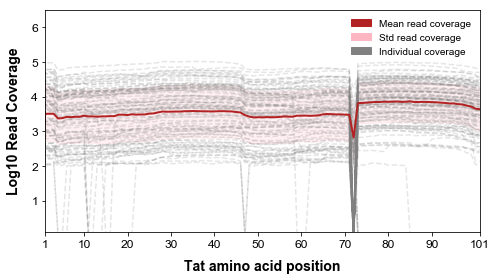

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# set fonts
mpl.rc('font',family='Arial')

fig, ax = plt.subplots(figsize=(7,4))
L = list(ngs_seq_meta_df['mean log coverage'])
L2 = [0] + L
E = list(ngs_seq_meta_df['std log coverage'])
E2 = [0] + E
y = np.array(L2)
x = np.arange(len(L2))

# plot it
ax.tick_params(axis='both',labelsize=12)

for c in indiv_cov:
    ax.plot(np.arange(len(c)), np.array(c), color='gray', ls='--', alpha=0.2)


ax.plot(x, y, linewidth=2, color='firebrick')
yerr = E2
ax.fill_between(x, y-yerr, y+yerr,facecolor='lightpink',edgecolor='lightpink',alpha=0.2)

ax.set_ylabel('Log10 Read Coverage',size=14, labelpad=10, weight='bold')
ax.set_ylim([0.1,6.5])

ax.set_xlabel('Tat amino acid position', size=14, labelpad=10, weight='bold')
xs = [1,10,20,30,40,50,60,70,80,90,101]
ax.set_xticks(xs)
ax.set_xlim([1,101])

ax.legend([mpl.patches.Patch(color='firebrick'),
           mpl.patches.Patch(color='lightpink'),
           mpl.patches.Patch(color='gray')],
           ['Mean read coverage', 'Std read coverage', 'Individual coverage'],
           loc=1, ncol=1, fancybox=False, frameon=False,
           fontsize=10)

plt.tight_layout()
plt.show()
fig.savefig('../figures/illumina_ngs_coverage.png',format='png', dpi=300, bbox_inches='tight')